# FAWN Weather Data - Exploratory Data Analysis
- The dataset represents the daily weather observations across 6 locations in Florida, ranging across the *southern peninsula* to the *western panhandle*

## EDA Workflow 
- The **analysis** of each step is labeled after *each* code cell if analysis was appropiate

In [2]:
# FAWN Weather Data - Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from datetime import datetime
warnings.filterwarnings('ignore')


In [3]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

## Load and Initial Reconnaissance
#### Data qualities explored
- `.shape`
- `.dtype`
- `.memory_usage()`
- `.describe()`: displays descriptive statistics of each column with numerical values
### Hypothesis Questions 
- What is the distribution across each variable?
- Were there missing values?
- Were `dtypes` correct?
- What can the data teach us about the weather in Florida from the beginning of 2022 to the end of 2024? 
  

In [4]:
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


print("STEP 1: LOAD & INITIAL RECONNAISSANCE")
# Load the data
df = pd.read_csv('data/FAWN_report.csv')

print("\n1.1 BASIC DATASET INFORMATION")
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n1.2 COLUMN NAMES AND TYPES")
print(df.dtypes)

print("\n1.3 FIRST FEW ROWS")
print(df.head(10))

print("\n1.4 LAST FEW ROWS")
print(df.tail(10))

print("\n1.5 BASIC STATISTICS")
print(df.describe())

print("\n1.6 DATASET INFO")
df.info()

print("\n1.7 UNIQUE VALUES IN CATEGORICAL COLUMNS")
print(f"Number of unique FAWN Stations: {df['FAWN Station'].nunique()}")
print(f"Unique Stations: {df['FAWN Station'].unique()}")
print(f"\nNumber of unique Periods: {df['Period'].nunique()}")
print(f"Sample Periods: {df['Period'].unique()[:10]}")

df.head()

STEP 1: LOAD & INITIAL RECONNAISSANCE

1.1 BASIC DATASET INFORMATION
Dataset Shape: 6572 rows × 20 columns
Memory Usage: 1.74 MB

1.2 COLUMN NAMES AND TYPES
FAWN Station                    object
Period                          object
2m T avg (F)                   float64
2m T min (F)                   float64
2m T max (F)                   float64
Tsoil avg-10cm  (F)            float64
Tsoil min(avg)-10cm  (F)       float64
Tsoil max(avg)-10cm  (F)       float64
2m DewPt avg (F)               float64
RelHum avg 2m  (pct)             int64
2m Rain tot (in)               float64
2m Rain max over 15min (in)    float64
SolRad avg2m  (w/m^2)          float64
10m Wind avg (mph)             float64
10m Wind min (mph)             float64
10m Wind max (mph)             float64
WDir avg10m  (deg)               int64
BP avg (mb)                      int64
N (# obs)                        int64
2m WetBulb (F)                 float64
dtype: object

1.3 FIRST FEW ROWS
  FAWN Station       Period  

,FAWN Station,Period,2m T avg (F),2m T min (F),2m T max (F),Tsoil avg-10cm (F),Tsoil min(avg)-10cm (F),Tsoil max(avg)-10cm (F),2m DewPt avg (F),RelHum avg 2m (pct),2m Rain tot (in),2m Rain max over 15min (in),SolRad avg2m (w/m^2),10m Wind avg (mph),10m Wind min (mph),10m Wind max (mph),WDir avg10m (deg),BP avg (mb),N (# obs),2m WetBulb (F)
0,Apopka,1 Jan 2022,73.40,66.40,82.40,72.59,70.05,75.51,65.34,78,0.00,0.00,156.50,4.29,0.00,17.83,196,1014,96,67.97
1,Apopka,2 Jan 2022,73.41,67.06,81.93,73.30,71.33,76.21,68.16,84,0.00,0.00,124.04,5.42,0.13,18.36,221,1013,96,69.80
2,Apopka,3 Jan 2022,61.63,47.97,71.69,71.53,68.76,73.78,50.10,68,0.03,0.03,178.06,9.36,0.43,28.50,309,1016,96,55.06
3,Apopka,4 Jan 2022,58.21,43.94,72.05,67.77,64.67,70.65,51.42,80,0.00,0.00,144.97,5.12,0.05,16.96,39,1019,96,54.32
4,Apopka,5 Jan 2022,62.97,54.84,74.03,68.73,66.36,71.55,58.64,87,0.00,0.00,116.53,4.12,0.02,14.23,353,1014,96,60.27


## Data Quality Assessment
- Checked: `.dtype` for correct date format
- Searched for missing values (NaN values)
- Identified outliers using `quantile()`


In [6]:
print("STEP 2: DATA QUALITY ASSESSMENT")

print("\n2.1 MISSING VALUES ANALYSIS")
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percentage': missing_pct
}).sort_values('Missing_Count', ascending=False)

if missing_df['Missing_Count'].sum() > 0:
    print(missing_df[missing_df['Missing_Count'] > 0])
else:
    print("No missing values detected in the dataset!")
    print("\nAll columns have complete data:")
    print(missing_df.head())

# Visualize missing data
if missing_df['Missing_Count'].sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_df[missing_df['Missing_Count'] > 0].plot(kind='bar', y='Missing_Percentage')
    plt.title('Missing Data Percentage by Column')
    plt.ylabel('Percentage Missing (%)')
    plt.xlabel('Columns')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print(" No missing values found in the dataset!")

print("\n2.2 DATA TYPES CHECK")
print("Expected types vs Actual types:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

# Check if Period should be datetime
print(f"\nSample Period values: {df['Period'].head()}")

print("\n2.3 DUPLICATE ROWS")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")

print("\n2.4 OUTLIER DETECTION (IQR Method)")
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    if len(outliers) > 0:
        print(f"\n{col}:")
        print(f"  Outliers: {len(outliers)} ({(len(outliers)/len(df))*100:.2f}%)")
        print(f"  Range: [{df[col].min():.2f}, {df[col].max():.2f}]")
        print(f"  Expected range (IQR): [{lower_bound:.2f}, {upper_bound:.2f}]")

print("\n2.5 ZERO/NEGATIVE VALUES CHECK")
for col in numeric_cols:
    zeros = (df[col] == 0).sum()
    negatives = (df[col] < 0).sum()
    if zeros > 0 or negatives > 0:
        print(f"{col}: {zeros} zeros, {negatives} negative values")

print("\n2.6 CONSISTENCY CHECKS")
# Check if min < avg < max for temperature
temp_issues = df[
    (df['2m T min (F)'] > df['2m T avg (F)']) | 
    (df['2m T avg (F)'] > df['2m T max (F)'])
]
print(f"Temperature consistency issues: {len(temp_issues)} rows")

# Check if soil temp min < avg < max
soil_issues = df[
    (df['Tsoil min(avg)-10cm  (F)'] > df['Tsoil avg-10cm  (F)']) | 
    (df['Tsoil avg-10cm  (F)'] > df['Tsoil max(avg)-10cm  (F)'])
]
print(f"Soil temperature consistency issues: {len(soil_issues)} rows")

# Check if wind min < avg < max
wind_issues = df[
    (df['10m Wind min (mph)'] > df['10m Wind avg (mph)']) | 
    (df['10m Wind avg (mph)'] > df['10m Wind max (mph)'])
]
print(f"Wind speed consistency issues: {len(wind_issues)} rows")

print("\n2.7 UNIQUE STATION ANALYSIS")
station_counts = df['FAWN Station'].value_counts()
print(f"Total stations: {len(station_counts)}")
print(f"\nObservations per station:")
print(station_counts.head(10))

print("\n2.8 DATA QUALITY SUMMARY")
print("Issues Found:")
print(f" Missing values: {missing_df['Missing_Count'].sum()} total")
print(f" Duplicates: {duplicates}")
print(f" Potential outliers detected in multiple variables")
print(f" Consistency issues in min/avg/max relationships")

df.head()

STEP 2: DATA QUALITY ASSESSMENT

2.1 MISSING VALUES ANALYSIS
No missing values detected in the dataset!

All columns have complete data:
              Missing_Count  Missing_Percentage
FAWN Station              0                0.00
Period                    0                0.00
2m T avg (F)              0                0.00
2m T min (F)              0                0.00
2m T max (F)              0                0.00
 No missing values found in the dataset!

2.2 DATA TYPES CHECK
Expected types vs Actual types:
FAWN Station: object
Period: object
2m T avg (F): float64
2m T min (F): float64
2m T max (F): float64
Tsoil avg-10cm  (F): float64
Tsoil min(avg)-10cm  (F): float64
Tsoil max(avg)-10cm  (F): float64
2m DewPt avg (F): float64
RelHum avg 2m  (pct): int64
2m Rain tot (in): float64
2m Rain max over 15min (in): float64
SolRad avg2m  (w/m^2): float64
10m Wind avg (mph): float64
10m Wind min (mph): float64
10m Wind max (mph): float64
WDir avg10m  (deg): int64
BP avg (mb): int64
N (#

,FAWN Station,Period,2m T avg (F),2m T min (F),2m T max (F),Tsoil avg-10cm (F),Tsoil min(avg)-10cm (F),Tsoil max(avg)-10cm (F),2m DewPt avg (F),RelHum avg 2m (pct),2m Rain tot (in),2m Rain max over 15min (in),SolRad avg2m (w/m^2),10m Wind avg (mph),10m Wind min (mph),10m Wind max (mph),WDir avg10m (deg),BP avg (mb),N (# obs),2m WetBulb (F)
0,Apopka,1 Jan 2022,73.40,66.40,82.40,72.59,70.05,75.51,65.34,78,0.00,0.00,156.50,4.29,0.00,17.83,196,1014,96,67.97
1,Apopka,2 Jan 2022,73.41,67.06,81.93,73.30,71.33,76.21,68.16,84,0.00,0.00,124.04,5.42,0.13,18.36,221,1013,96,69.80
2,Apopka,3 Jan 2022,61.63,47.97,71.69,71.53,68.76,73.78,50.10,68,0.03,0.03,178.06,9.36,0.43,28.50,309,1016,96,55.06
3,Apopka,4 Jan 2022,58.21,43.94,72.05,67.77,64.67,70.65,51.42,80,0.00,0.00,144.97,5.12,0.05,16.96,39,1019,96,54.32
4,Apopka,5 Jan 2022,62.97,54.84,74.03,68.73,66.36,71.55,58.64,87,0.00,0.00,116.53,4.12,0.02,14.23,353,1014,96,60.27


### Analysis 
#### Outliers
- Evaluated the number of outliers in each column 
- The outliers could represent days where data was not being collected for that attribute
    - Did not remove them for the purpose of displaying them in graphs 

## Cleaning Decisions
- changed `Period` `dtype` to datetime
- Searched for missing values (NaN values)
    - None found 

In [5]:
print("STEP 3: CLEANING DECISIONS AND IMPLEMENTATION")

print(f"\nOriginal dataset shape: {df.shape}")

# Create a copy for cleaning
df_clean = df.copy()

print("\n3.1 HANDLE DUPLICATES")
duplicates_before = df_clean.duplicated().sum()
df_clean = df_clean.drop_duplicates()
print(f"Duplicates removed: {duplicates_before}")
print(f"New shape: {df_clean.shape}")

print("\n3.2 FIX DATA TYPES")
# Convert Period to datetime
try:
    df_clean['Period'] = pd.to_datetime(df_clean['Period'])
    print(" Period converted to datetime")
except:
    print(" Could not convert Period to datetime - keeping as string")

# Ensure numeric columns are numeric
numeric_columns = [
    '2m T avg (F)', '2m T min (F)', '2m T max (F)',
    'Tsoil avg-10cm  (F)', 'Tsoil min(avg)-10cm  (F)', 'Tsoil max(avg)-10cm  (F)',
    '2m DewPt avg (F)', 'RelHum avg 2m  (pct)', '2m Rain tot (in)',
    '2m Rain max over 15min (in)', 'SolRad avg2m  (w/m^2)',
    '10m Wind avg (mph)', '10m Wind min (mph)', '10m Wind max (mph)',
    'WDir avg10m  (deg)', 'BP avg (mb)', 'N (# obs)', '2m WetBulb (F)'
]

for col in numeric_columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
print(f" Numeric columns verified")

print("\n3.3 HANDLE MISSING VALUES")
missing_before = df_clean.isnull().sum().sum()

# Decision rules for missing values:
# 1. If a row has > 50% missing values, remove it
threshold = 0.5 * len(df_clean.columns)
df_clean = df_clean.dropna(thresh=threshold)
print(f"Rows with >50% missing removed: {len(df) - len(df_clean)}")

# 2. For specific columns with few missing values, use forward fill or interpolation
for col in numeric_columns:
    missing_pct = df_clean[col].isnull().sum() / len(df_clean)
    if 0 < missing_pct < 0.05:  # Less than 5% missing
        df_clean[col] = df_clean[col].interpolate(method='linear')
        print(f" {col}: Interpolated {missing_pct*100:.2f}% missing values")

missing_after = df_clean.isnull().sum().sum()
print(f"\nMissing values: {missing_before} → {missing_after}")

print("\n3.4 HANDLE OUTLIERS")
print("Decision: Keep outliers but flag them for investigation")
print("Rationale: Weather data can have legitimate extreme values")

# Flag extreme outliers (beyond 3 standard deviations)
df_clean['has_outlier'] = False
for col in numeric_columns:
    if col in df_clean.columns:
        mean = df_clean[col].mean()
        std = df_clean[col].std()
        outliers = (df_clean[col] < mean - 3*std) | (df_clean[col] > mean + 3*std)
        df_clean.loc[outliers, 'has_outlier'] = True

outlier_count = df_clean['has_outlier'].sum()
print(f"Rows flagged with extreme outliers: {outlier_count} ({outlier_count/len(df_clean)*100:.2f}%)")

print("\n3.5 FIX CONSISTENCY ISSUES")
# Fix temperature min/max issues
temp_fixes = 0
mask = df_clean['2m T min (F)'] > df_clean['2m T max (F)']
if mask.sum() > 0:
    # Swap min and max if inverted
    df_clean.loc[mask, ['2m T min (F)', '2m T max (F)']] = df_clean.loc[mask, ['2m T max (F)', '2m T min (F)']].values
    temp_fixes = mask.sum()
print(f"Temperature min/max swapped: {temp_fixes} rows")

# Fix soil temperature issues
soil_fixes = 0
mask = df_clean['Tsoil min(avg)-10cm  (F)'] > df_clean['Tsoil max(avg)-10cm  (F)']
if mask.sum() > 0:
    df_clean.loc[mask, ['Tsoil min(avg)-10cm  (F)', 'Tsoil max(avg)-10cm  (F)']] = \
        df_clean.loc[mask, ['Tsoil max(avg)-10cm  (F)', 'Tsoil min(avg)-10cm  (F)']].values
    soil_fixes = mask.sum()
print(f"Soil temperature min/max swapped: {soil_fixes} rows")

# Fix wind speed issues
wind_fixes = 0
mask = df_clean['10m Wind min (mph)'] > df_clean['10m Wind max (mph)']
if mask.sum() > 0:
    df_clean.loc[mask, ['10m Wind min (mph)', '10m Wind max (mph)']] = \
        df_clean.loc[mask, ['10m Wind max (mph)', '10m Wind min (mph)']].values
    wind_fixes = mask.sum()
print(f"Wind speed min/max swapped: {wind_fixes} rows")

print("\n3.6 REMOVE INVALID RECORDS")
# Remove records with impossible values
initial_len = len(df_clean)

# Temperature should be within reasonable Florida range
df_clean = df_clean[
    (df_clean['2m T avg (F)'] >= -20) & 
    (df_clean['2m T avg (F)'] <= 120)
]

# Humidity should be 0-100%
df_clean = df_clean[
    (df_clean['RelHum avg 2m  (pct)'] >= 0) & 
    (df_clean['RelHum avg 2m  (pct)'] <= 100)
]

# Rain cannot be negative
df_clean = df_clean[df_clean['2m Rain tot (in)'] >= 0]

# Wind direction should be 0-360 degrees
df_clean = df_clean[
    (df_clean['WDir avg10m  (deg)'] >= 0) & 
    (df_clean['WDir avg10m  (deg)'] <= 360)
]

removed = initial_len - len(df_clean)
print(f"Invalid records removed: {removed}")

print("\n3.7 SAVE CLEANED DATA")
df_clean.to_csv('FAWN_report_cleaned.csv', index=False)
print(" Cleaned data saved to: FAWN_report_cleaned.csv")

print("\n3.8 CLEANING SUMMARY")
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")
print(f"Rows removed: {len(df) - len(df_clean)} ({((len(df) - len(df_clean))/len(df))*100:.2f}%)")
print(f"Columns added: 1 (has_outlier flag)")

df.head()

STEP 3: CLEANING DECISIONS AND IMPLEMENTATION

Original dataset shape: (6572, 20)

3.1 HANDLE DUPLICATES
Duplicates removed: 0
New shape: (6572, 20)

3.2 FIX DATA TYPES
 Period converted to datetime
 Numeric columns verified

3.3 HANDLE MISSING VALUES
Rows with >50% missing removed: 0

Missing values: 0 → 0

3.4 HANDLE OUTLIERS
Decision: Keep outliers but flag them for investigation
Rationale: Weather data can have legitimate extreme values
Rows flagged with extreme outliers: 578 (8.79%)

3.5 FIX CONSISTENCY ISSUES
Temperature min/max swapped: 0 rows
Soil temperature min/max swapped: 0 rows
Wind speed min/max swapped: 0 rows

3.6 REMOVE INVALID RECORDS
Invalid records removed: 0

3.7 SAVE CLEANED DATA
 Cleaned data saved to: FAWN_report_cleaned.csv

3.8 CLEANING SUMMARY
Original shape: (6572, 20)
Cleaned shape: (6572, 21)
Rows removed: 0 (0.00%)
Columns added: 1 (has_outlier flag)


,FAWN Station,Period,2m T avg (F),2m T min (F),2m T max (F),Tsoil avg-10cm (F),Tsoil min(avg)-10cm (F),Tsoil max(avg)-10cm (F),2m DewPt avg (F),RelHum avg 2m (pct),2m Rain tot (in),2m Rain max over 15min (in),SolRad avg2m (w/m^2),10m Wind avg (mph),10m Wind min (mph),10m Wind max (mph),WDir avg10m (deg),BP avg (mb),N (# obs),2m WetBulb (F)
0,Apopka,1 Jan 2022,73.40,66.40,82.40,72.59,70.05,75.51,65.34,78,0.00,0.00,156.50,4.29,0.00,17.83,196,1014,96,67.97
1,Apopka,2 Jan 2022,73.41,67.06,81.93,73.30,71.33,76.21,68.16,84,0.00,0.00,124.04,5.42,0.13,18.36,221,1013,96,69.80
2,Apopka,3 Jan 2022,61.63,47.97,71.69,71.53,68.76,73.78,50.10,68,0.03,0.03,178.06,9.36,0.43,28.50,309,1016,96,55.06
3,Apopka,4 Jan 2022,58.21,43.94,72.05,67.77,64.67,70.65,51.42,80,0.00,0.00,144.97,5.12,0.05,16.96,39,1019,96,54.32
4,Apopka,5 Jan 2022,62.97,54.84,74.03,68.73,66.36,71.55,58.64,87,0.00,0.00,116.53,4.12,0.02,14.23,353,1014,96,60.27


## Statistical EDA

STEP 4: STATISTICAL EXPLORATORY DATA ANALYSIS

4.1 UNIVARIATE ANALYSIS - DISTRIBUTIONS


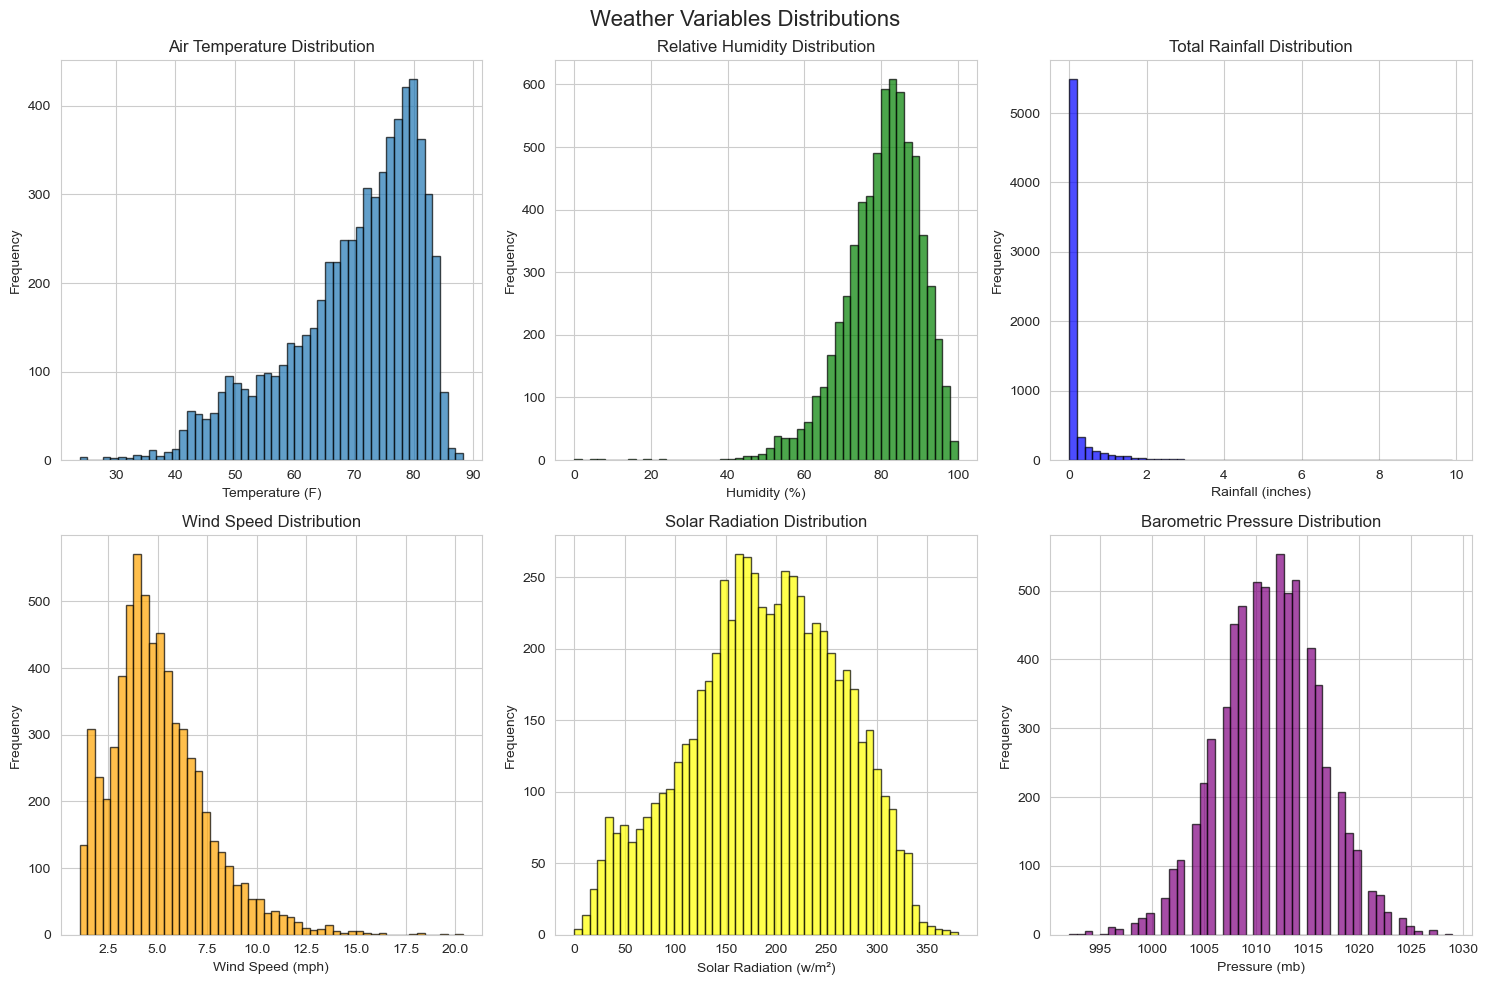


4.2 BIVARIATE ANALYSIS - RELATIONSHIPS


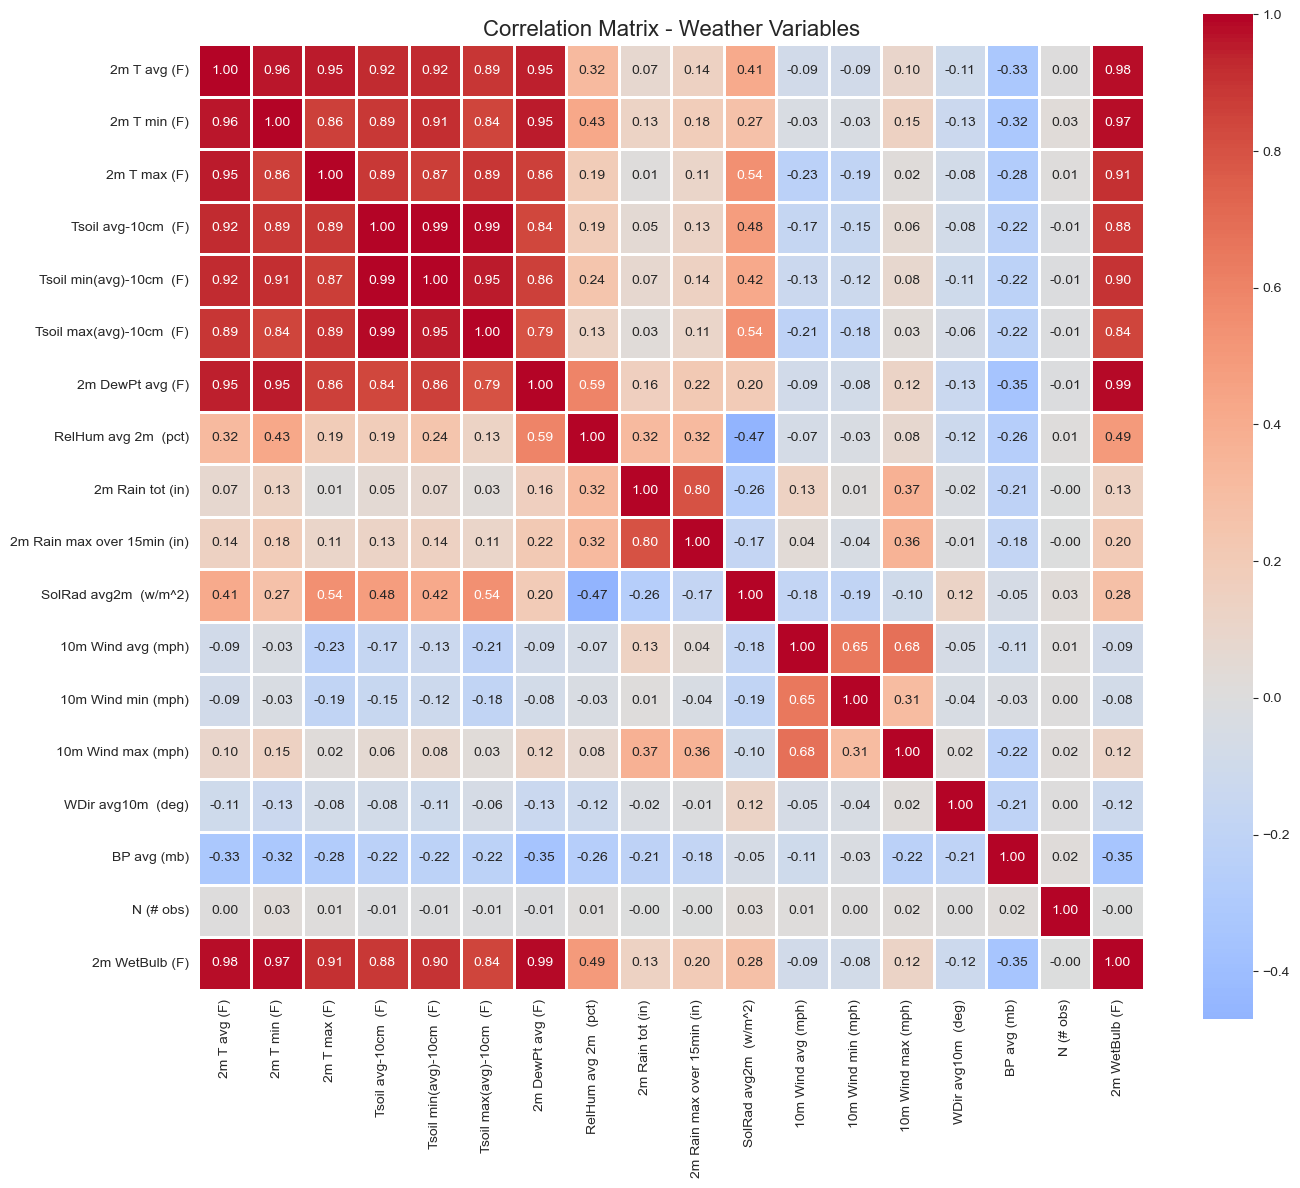


Strongest Correlations (|r| > 0.5):
2m T avg (F) ↔ 2m T min (F): 0.964
2m T avg (F) ↔ 2m T max (F): 0.950
2m T avg (F) ↔ Tsoil avg-10cm  (F): 0.920
2m T avg (F) ↔ Tsoil min(avg)-10cm  (F): 0.924
2m T avg (F) ↔ Tsoil max(avg)-10cm  (F): 0.891
2m T avg (F) ↔ 2m DewPt avg (F): 0.945
2m T avg (F) ↔ 2m WetBulb (F): 0.981
2m T min (F) ↔ 2m T max (F): 0.858
2m T min (F) ↔ Tsoil avg-10cm  (F): 0.888
2m T min (F) ↔ Tsoil min(avg)-10cm  (F): 0.914
2m T min (F) ↔ Tsoil max(avg)-10cm  (F): 0.841
2m T min (F) ↔ 2m DewPt avg (F): 0.951
2m T min (F) ↔ 2m WetBulb (F): 0.973
2m T max (F) ↔ Tsoil avg-10cm  (F): 0.889
2m T max (F) ↔ Tsoil min(avg)-10cm  (F): 0.868
2m T max (F) ↔ Tsoil max(avg)-10cm  (F): 0.892
2m T max (F) ↔ 2m DewPt avg (F): 0.861
2m T max (F) ↔ SolRad avg2m  (w/m^2): 0.542
2m T max (F) ↔ 2m WetBulb (F): 0.907
Tsoil avg-10cm  (F) ↔ Tsoil min(avg)-10cm  (F): 0.989
Tsoil avg-10cm  (F) ↔ Tsoil max(avg)-10cm  (F): 0.985
Tsoil avg-10cm  (F) ↔ 2m DewPt avg (F): 0.839
Tsoil avg-10cm  (F) ↔ 2m

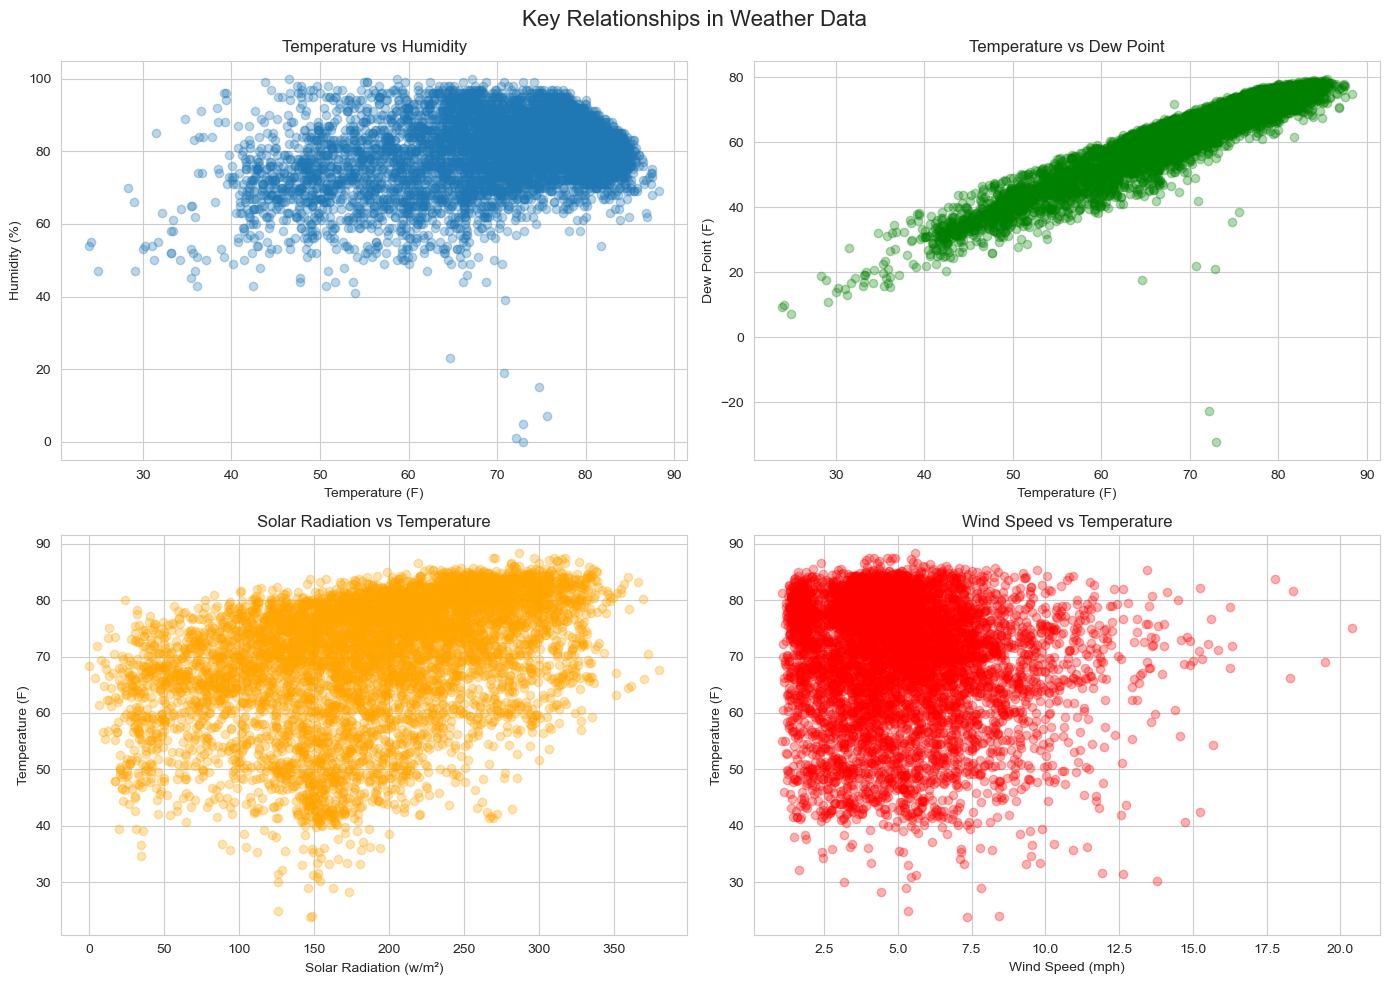


4.3 CATEGORICAL ANALYSIS - BY STATION

Station-level Summary:
                 2m T avg (F)                   2m Rain tot (in)  \
                         mean   std   min   max              sum   
FAWN Station                                                       
Apopka                  72.37  9.19 35.40 87.53           175.26   
DeFuniak Springs        67.05 12.21 23.95 86.89           155.06   
Homestead               75.69  6.39 46.62 85.99           218.67   
Jay                     67.41 12.25 24.12 87.52           176.75   
Live Oak                69.24 11.03 29.08 88.27           161.65   
Monticello              67.43 11.45 24.92 85.50           194.45   

                 10m Wind avg (mph) RelHum avg 2m  (pct)  
                               mean                 mean  
FAWN Station                                              
Apopka                         5.48                78.17  
DeFuniak Springs               5.48                79.54  
Homestead                    

<Figure size 1400x600 with 0 Axes>

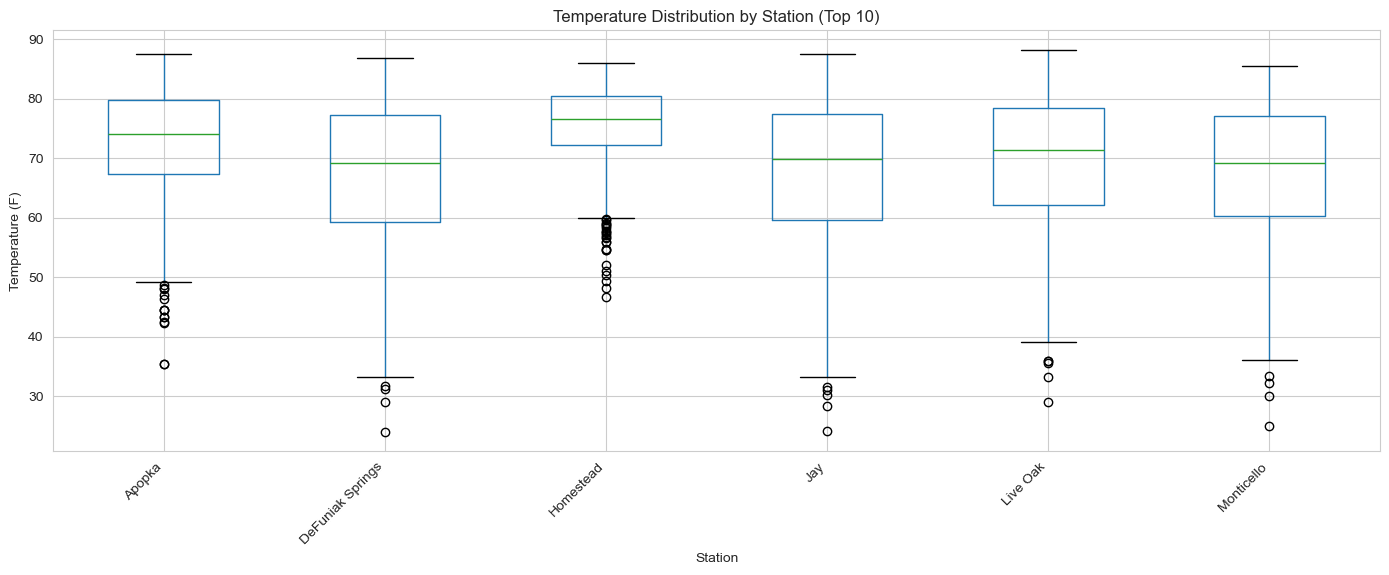


4.4 TEMPORAL PATTERNS


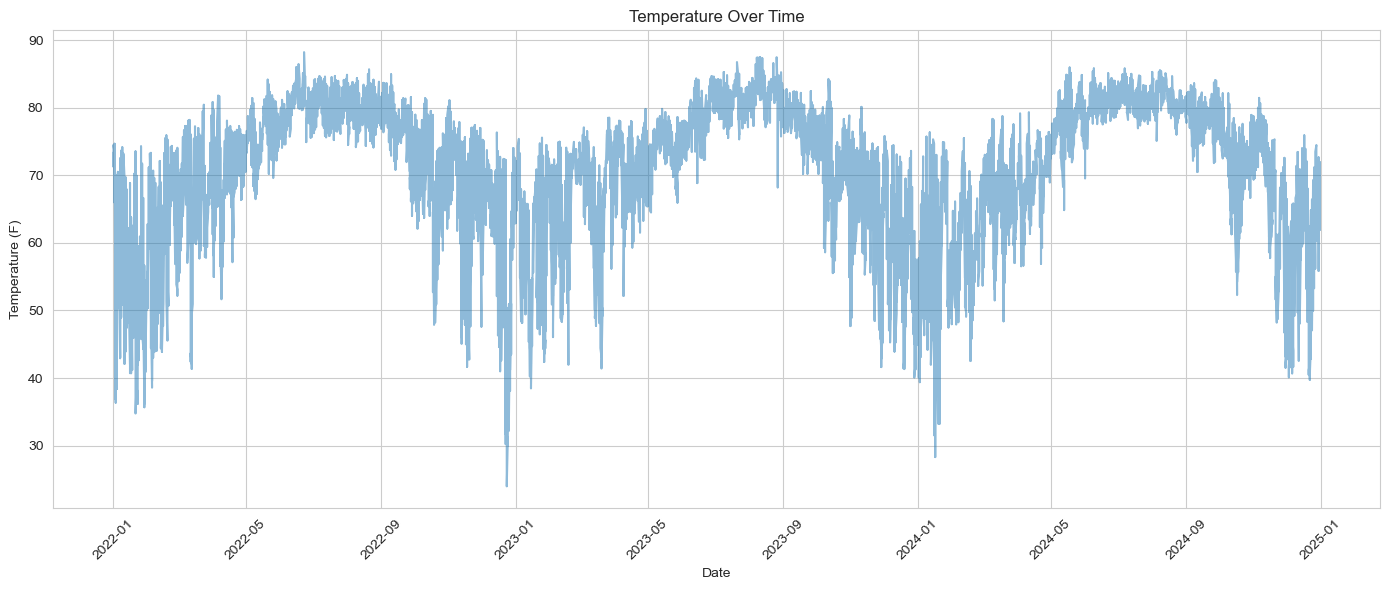

 Temporal patterns visualized


,FAWN Station,Period,2m T avg (F),2m T min (F),2m T max (F),Tsoil avg-10cm (F),Tsoil min(avg)-10cm (F),Tsoil max(avg)-10cm (F),2m DewPt avg (F),RelHum avg 2m (pct),2m Rain tot (in),2m Rain max over 15min (in),SolRad avg2m (w/m^2),10m Wind avg (mph),10m Wind min (mph),10m Wind max (mph),WDir avg10m (deg),BP avg (mb),N (# obs),2m WetBulb (F)
0,Apopka,2022-01-01,73.40,66.40,82.40,72.59,70.05,75.51,65.34,78,0.00,0.00,156.50,4.29,0.00,17.83,196,1014,96,67.97
1,Apopka,2022-01-02,73.41,67.06,81.93,73.30,71.33,76.21,68.16,84,0.00,0.00,124.04,5.42,0.13,18.36,221,1013,96,69.80
2,Apopka,2022-01-03,61.63,47.97,71.69,71.53,68.76,73.78,50.10,68,0.03,0.03,178.06,9.36,0.43,28.50,309,1016,96,55.06
3,Apopka,2022-01-04,58.21,43.94,72.05,67.77,64.67,70.65,51.42,80,0.00,0.00,144.97,5.12,0.05,16.96,39,1019,96,54.32
4,Apopka,2022-01-05,62.97,54.84,74.03,68.73,66.36,71.55,58.64,87,0.00,0.00,116.53,4.12,0.02,14.23,353,1014,96,60.27


In [7]:
print("STEP 4: STATISTICAL EXPLORATORY DATA ANALYSIS")

# UNIVARIATE ANALYSIS
print("\n4.1 UNIVARIATE ANALYSIS - DISTRIBUTIONS")

# Temperature distribution
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Weather Variables Distributions', fontsize=16)

# Temperature
axes[0, 0].hist(df['2m T avg (F)'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Air Temperature Distribution')
axes[0, 0].set_xlabel('Temperature (F)')
axes[0, 0].set_ylabel('Frequency')

# Humidity
axes[0, 1].hist(df['RelHum avg 2m  (pct)'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('Relative Humidity Distribution')
axes[0, 1].set_xlabel('Humidity (%)')
axes[0, 1].set_ylabel('Frequency')

# Rainfall
axes[0, 2].hist(df['2m Rain tot (in)'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='blue')
axes[0, 2].set_title('Total Rainfall Distribution')
axes[0, 2].set_xlabel('Rainfall (inches)')
axes[0, 2].set_ylabel('Frequency')

# Wind Speed
axes[1, 0].hist(df['10m Wind avg (mph)'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_title('Wind Speed Distribution')
axes[1, 0].set_xlabel('Wind Speed (mph)')
axes[1, 0].set_ylabel('Frequency')

# Solar Radiation
axes[1, 1].hist(df['SolRad avg2m  (w/m^2)'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='yellow')
axes[1, 1].set_title('Solar Radiation Distribution')
axes[1, 1].set_xlabel('Solar Radiation (w/m²)')
axes[1, 1].set_ylabel('Frequency')

# Barometric Pressure
axes[1, 2].hist(df['BP avg (mb)'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1, 2].set_title('Barometric Pressure Distribution')
axes[1, 2].set_xlabel('Pressure (mb)')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# BIVARIATE ANALYSIS
print("\n4.2 BIVARIATE ANALYSIS - RELATIONSHIPS")

# Correlation matrix
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix - Weather Variables', fontsize=16)
plt.tight_layout()
plt.show()

# Strong correlations
print("\nStrongest Correlations (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f"{correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

# Key scatter plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Key Relationships in Weather Data', fontsize=16)

# Temperature vs Humidity
axes[0, 0].scatter(df['2m T avg (F)'], df['RelHum avg 2m  (pct)'], alpha=0.3)
axes[0, 0].set_xlabel('Temperature (F)')
axes[0, 0].set_ylabel('Humidity (%)')
axes[0, 0].set_title('Temperature vs Humidity')

# Temperature vs Dew Point
axes[0, 1].scatter(df['2m T avg (F)'], df['2m DewPt avg (F)'], alpha=0.3, color='green')
axes[0, 1].set_xlabel('Temperature (F)')
axes[0, 1].set_ylabel('Dew Point (F)')
axes[0, 1].set_title('Temperature vs Dew Point')

# Solar Radiation vs Temperature
axes[1, 0].scatter(df['SolRad avg2m  (w/m^2)'], df['2m T avg (F)'], alpha=0.3, color='orange')
axes[1, 0].set_xlabel('Solar Radiation (w/m²)')
axes[1, 0].set_ylabel('Temperature (F)')
axes[1, 0].set_title('Solar Radiation vs Temperature')

# Wind Speed vs Temperature
axes[1, 1].scatter(df['10m Wind avg (mph)'], df['2m T avg (F)'], alpha=0.3, color='red')
axes[1, 1].set_xlabel('Wind Speed (mph)')
axes[1, 1].set_ylabel('Temperature (F)')
axes[1, 1].set_title('Wind Speed vs Temperature')

plt.tight_layout()
plt.show()

# CATEGORICAL ANALYSIS
print("\n4.3 CATEGORICAL ANALYSIS - BY STATION")

# Temperature by station
station_stats = df.groupby('FAWN Station').agg({
    '2m T avg (F)': ['mean', 'std', 'min', 'max'],
    '2m Rain tot (in)': 'sum',
    '10m Wind avg (mph)': 'mean',
    'RelHum avg 2m  (pct)': 'mean'
}).round(2)

print("\nStation-level Summary:")
print(station_stats.head(10))

# Box plot of temperature by station (top 10 stations)
top_stations = df['FAWN Station'].value_counts().head(10).index
df_top = df[df['FAWN Station'].isin(top_stations)]

plt.figure(figsize=(14, 6))
df_top.boxplot(column='2m T avg (F)', by='FAWN Station', figsize=(14, 6))
plt.title('Temperature Distribution by Station (Top 10)')
plt.suptitle('')
plt.xlabel('Station')
plt.ylabel('Temperature (F)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# TIME SERIES PATTERNS
print("\n4.4 TEMPORAL PATTERNS")

if 'Period' in df.columns:
    try:
        df['Period'] = pd.to_datetime(df['Period'])
        df_time = df.sort_values('Period')
        
        # Plot temperature over time
        plt.figure(figsize=(14, 6))
        plt.plot(df_time['Period'], df_time['2m T avg (F)'], alpha=0.5)
        plt.title('Temperature Over Time')
        plt.xlabel('Date')
        plt.ylabel('Temperature (F)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        print(" Temporal patterns visualized")
    except:
        print(" Could not analyze temporal patterns")
        
df.head()

### Analysis 
#### What is the distribution across each variable?
- Distributions of six weather variables showed mostly normal distributions except for total rainfall
- Air temperature also showed a slight skewness with a majority of warmer temperatures and fewer temperatures below 60°F.
- Distributions for relative humidity, solar radiation and barometric pressure were normal. 
- Total Rainfall was skewed heavily to the low side.  
  - Most observations (over 5500 out of 6700) of rainfall are zero.
- Wind speed was distributed around a mean of about 5 mph, with some skewness towards slower wind speeds.  

#### What does the Weather matrix show us
- Strong correlations (above r=0.80) were found among soil and air temperatures and wet bulb temperatures.
- Moderate correlations (between 0.50-0.79) were found among temperatures and solar radiation. 

#### How do certain types of weather data and weather factors affect each other 
- Strong graphical relationships were found between average air temperatures and dew point.
- A moderate graphical relationship was seen between solar radiation and temperature.

#### How do temperatures at each station location compare to each other 
- Air temperature box plots showed that southern locations in Homestead and Apopka had more uniform temperatures overall than other locations. 

#### How does temperature change over time 
- The graph of temperature over time shows the typical seasonal pattern each year (2022-2024).

## Transformation and feature engineering 

STEP 5: TRANSFORMATION & FEATURE ENGINEERING

Original shape: (6572, 47)

5.1 EXTRACT TEMPORAL FEATURES
 Created: Year, Month, Day, DayOfWeek, Quarter, WeekOfYear, Season

5.2 ENGINEER TEMPERATURE FEATURES
 Created: Temp_Range, Soil_Temp_Range, Temp_Category, Apparent_Temp

5.3 ENGINEER WIND FEATURES
 Created: Wind_Range, Wind_Category, Wind_Chill

5.4 ENGINEER PRECIPITATION FEATURES
 Created: Rain_Category, Has_Rain, Rain_Intensity

5.5 ENGINEER HUMIDITY FEATURES
 Created: Humidity_Comfort, Dewpoint_Comfort

5.6 ENGINEER SOLAR FEATURES
 Created: Solar_Category

5.7 CREATE COMPOSITE INDICES
 Created: Comfort_Index, Weather_Severity

5.8 CREATE STATION-LEVEL FEATURES
 Created: Station_Avg_Temp, Station_Avg_Rain, Temp_Deviation_From_Station

5.9 CREATE INTERACTION FEATURES
 Created: Temp_Humidity_Interaction, Wind_Rain_Interaction

5.10 SAVE FEATURE-ENGINEERED DATASET
 Saved: FAWN_report_features.csv
Final shape: (6572, 47)
New features created: 27

5.11 VISUALIZE ENGINEERED FEATURES


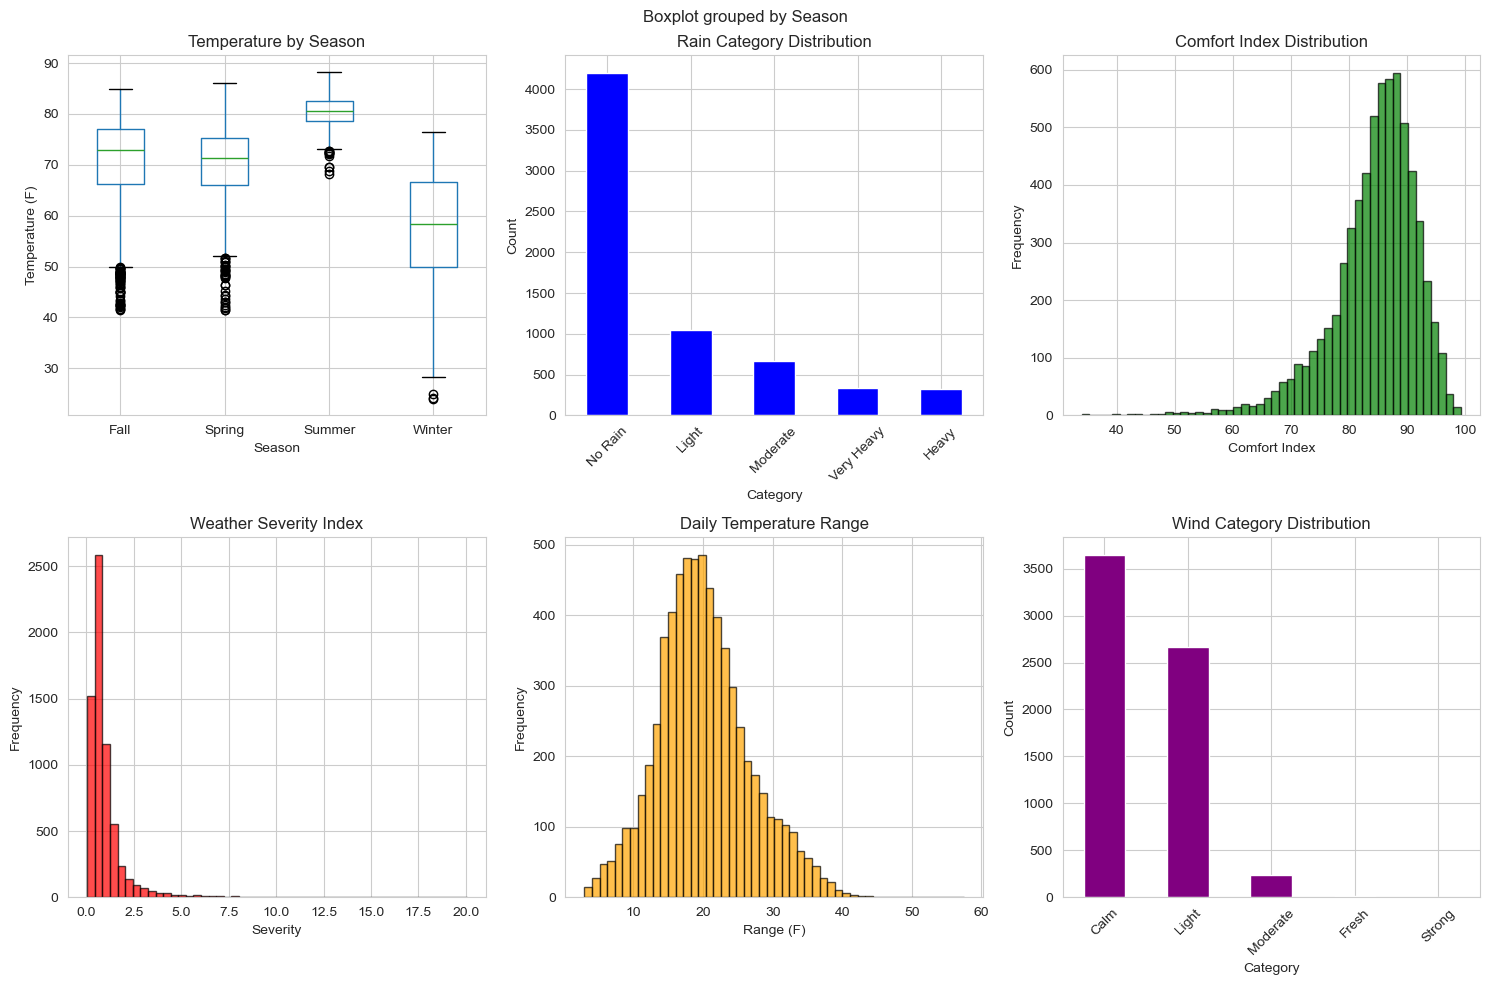

In [10]:
print("STEP 5: TRANSFORMATION & FEATURE ENGINEERING")

print(f"\nOriginal shape: {df.shape}")

# DATETIME FEATURES
print("\n5.1 EXTRACT TEMPORAL FEATURES")

if 'Period' in df.columns:
    df['Period'] = pd.to_datetime(df['Period'], errors='coerce')
    df['Year'] = df['Period'].dt.year
    df['Month'] = df['Period'].dt.month
    df['Day'] = df['Period'].dt.day
    df['DayOfWeek'] = df['Period'].dt.dayofweek
    df['Quarter'] = df['Period'].dt.quarter
    df['WeekOfYear'] = df['Period'].dt.isocalendar().week
    df['Season'] = df['Month'].map({
        12: 'Winter', 1: 'Winter', 2: 'Winter',
        3: 'Spring', 4: 'Spring', 5: 'Spring',
        6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Fall', 10: 'Fall', 11: 'Fall'
    })
    print(" Created: Year, Month, Day, DayOfWeek, Quarter, WeekOfYear, Season")

# TEMPERATURE FEATURES
print("\n5.2 ENGINEER TEMPERATURE FEATURES")

# Temperature range (daily variation)
df['Temp_Range'] = df['2m T max (F)'] - df['2m T min (F)']

# Soil temperature range
df['Soil_Temp_Range'] = df['Tsoil max(avg)-10cm  (F)'] - df['Tsoil min(avg)-10cm  (F)']

# Temperature categories
df['Temp_Category'] = pd.cut(df['2m T avg (F)'], 
                              bins=[-np.inf, 32, 50, 70, 85, np.inf],
                              labels=['Freezing', 'Cold', 'Mild', 'Warm', 'Hot'])

# Heat index approximation (simplified)
df['Apparent_Temp'] = df['2m T avg (F)'] + 0.33 * df['RelHum avg 2m  (pct)'] / 100 * (df['2m T avg (F)'] - 70)

print(" Created: Temp_Range, Soil_Temp_Range, Temp_Category, Apparent_Temp")

# WIND FEATURES
print("\n5.3 ENGINEER WIND FEATURES")

# Wind speed range
df['Wind_Range'] = df['10m Wind max (mph)'] - df['10m Wind min (mph)']

# Wind categories
df['Wind_Category'] = pd.cut(df['10m Wind avg (mph)'],
                              bins=[0, 5, 10, 15, 25, np.inf],
                              labels=['Calm', 'Light', 'Moderate', 'Fresh', 'Strong'])

# Wind chill (when temp < 50F and wind > 3 mph)
mask = (df['2m T avg (F)'] < 50) & (df['10m Wind avg (mph)'] > 3)
df['Wind_Chill'] = np.where(
    mask,
    35.74 + 0.6215 * df['2m T avg (F)'] - 35.75 * (df['10m Wind avg (mph)'] ** 0.16) + 
    0.4275 * df['2m T avg (F)'] * (df['10m Wind avg (mph)'] ** 0.16),
    df['2m T avg (F)']
)

print(" Created: Wind_Range, Wind_Category, Wind_Chill")

# PRECIPITATION FEATURES
print("\n5.4 ENGINEER PRECIPITATION FEATURES")

# Rain intensity categories
df['Rain_Category'] = pd.cut(df['2m Rain tot (in)'],
                              bins=[-0.001, 0, 0.1, 0.5, 1.0, np.inf],
                              labels=['No Rain', 'Light', 'Moderate', 'Heavy', 'Very Heavy'])

# Rain flag
df['Has_Rain'] = (df['2m Rain tot (in)'] > 0).astype(int)

# Rain intensity (rain per 15min period)
df['Rain_Intensity'] = df['2m Rain max over 15min (in)'] / 0.25  # per hour

print(" Created: Rain_Category, Has_Rain, Rain_Intensity")

# HUMIDITY & DEW POINT FEATURES
print("\n5.5 ENGINEER HUMIDITY FEATURES")

# Humidity comfort categories
df['Humidity_Comfort'] = pd.cut(df['RelHum avg 2m  (pct)'],
                                 bins=[0, 30, 60, 80, 100],
                                 labels=['Dry', 'Comfortable', 'Humid', 'Very Humid'])

# Dew point comfort (based on dew point temperature)
df['Dewpoint_Comfort'] = pd.cut(df['2m DewPt avg (F)'],
                                bins=[-np.inf, 50, 60, 65, 70, np.inf],
                                labels=['Dry', 'Comfortable', 'Sticky', 'Uncomfortable', 'Oppressive'])

print(" Created: Humidity_Comfort, Dewpoint_Comfort")

# SOLAR RADIATION FEATURES
print("\n5.6 ENGINEER SOLAR FEATURES")

# Solar radiation categories
df['Solar_Category'] = pd.cut(df['SolRad avg2m  (w/m^2)'],
                               bins=[0, 200, 400, 600, 800, np.inf],
                               labels=['Low', 'Moderate', 'High', 'Very High', 'Extreme'])

print(" Created: Solar_Category")

# COMPOSITE FEATURES
print("\n5.7 CREATE COMPOSITE INDICES")

# Comfort index (normalized combination of temp, humidity, wind)
scaler = StandardScaler()
comfort_features = df[['2m T avg (F)', 'RelHum avg 2m  (pct)', '10m Wind avg (mph)']].copy()
comfort_scaled = scaler.fit_transform(comfort_features.fillna(comfort_features.mean()))
df['Comfort_Index'] = 100 - np.mean(np.abs(comfort_scaled), axis=1) * 20

# Weather severity index (combination of extremes)
df['Weather_Severity'] = (
    np.abs(df['2m T avg (F)'] - 70) / 20 +  # Temperature deviation
    df['10m Wind avg (mph)'] / 25 +  # Wind factor
    df['2m Rain tot (in)'] * 2  # Rain factor
)

print(" Created: Comfort_Index, Weather_Severity")

# STATION AGGREGATIONS
print("\n5.8 CREATE STATION-LEVEL FEATURES")

# Average conditions by station
station_avg_temp = df.groupby('FAWN Station')['2m T avg (F)'].transform('mean')
df['Station_Avg_Temp'] = station_avg_temp

station_avg_rain = df.groupby('FAWN Station')['2m Rain tot (in)'].transform('mean')
df['Station_Avg_Rain'] = station_avg_rain

# Deviation from station average
df['Temp_Deviation_From_Station'] = df['2m T avg (F)'] - df['Station_Avg_Temp']

print(" Created: Station_Avg_Temp, Station_Avg_Rain, Temp_Deviation_From_Station")

# INTERACTION FEATURES
print("\n5.9 CREATE INTERACTION FEATURES")

# Temperature * Humidity interaction
df['Temp_Humidity_Interaction'] = df['2m T avg (F)'] * df['RelHum avg 2m  (pct)']

# Wind * Rain interaction (storm indicator)
df['Wind_Rain_Interaction'] = df['10m Wind avg (mph)'] * df['2m Rain tot (in)']

print(" Created: Temp_Humidity_Interaction, Wind_Rain_Interaction")

# SAVE TRANSFORMED DATA
print("\n5.10 SAVE FEATURE-ENGINEERED DATASET")
df.to_csv('FAWN_report_features.csv', index=False)
print(f" Saved: FAWN_report_features.csv")
print(f"Final shape: {df.shape}")
print(f"New features created: {df.shape[1] - 20}")

# VISUALIZE NEW FEATURES
print("\n5.11 VISUALIZE ENGINEERED FEATURES")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Engineered Features Visualizations', fontsize=16)

# Temperature by Season
df.boxplot(column='2m T avg (F)', by='Season', ax=axes[0, 0])
axes[0, 0].set_title('Temperature by Season')
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('Temperature (F)')

# Rain by Category
df['Rain_Category'].value_counts().plot(kind='bar', ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Rain Category Distribution')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Comfort Index distribution
axes[0, 2].hist(df['Comfort_Index'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 2].set_title('Comfort Index Distribution')
axes[0, 2].set_xlabel('Comfort Index')
axes[0, 2].set_ylabel('Frequency')

# Weather Severity
axes[1, 0].hist(df['Weather_Severity'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='red')
axes[1, 0].set_title('Weather Severity Index')
axes[1, 0].set_xlabel('Severity')
axes[1, 0].set_ylabel('Frequency')

# Temperature Range
axes[1, 1].hist(df['Temp_Range'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].set_title('Daily Temperature Range')
axes[1, 1].set_xlabel('Range (F)')
axes[1, 1].set_ylabel('Frequency')

# Wind Category
df['Wind_Category'].value_counts().plot(kind='bar', ax=axes[1, 2], color='purple')
axes[1, 2].set_title('Wind Category Distribution')
axes[1, 2].set_xlabel('Category')
axes[1, 2].set_ylabel('Count')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Analysis
#### What can the data teach us about the weather in Florida from the beginning of 2022 to the end of 2024?
- The graphs above can teach us:
    - The temperature that Florida experiences is categorized by season
    - The number of days on which a different type of precipitation was experienced
    - The comfort level outside is based on the average temperature, humidity, and wind
    - The severity of the rain is based on the average temperature and wind, and total rain
    - The number of days on which the wind varied 
    - The Daily Temperature range is shown by frequency count


## Save and Document 

STEP 6: SAVE & DOCUMENT

6.1 GENERATE DATA DICTIONARY
✓ Data dictionary saved: FAWN_data_dictionary.csv
                Column_Name       Data_Type  \
0              FAWN Station          object   
1                    Period  datetime64[ns]   
2              2m T avg (F)         float64   
3              2m T min (F)         float64   
4              2m T max (F)         float64   
5       Tsoil avg-10cm  (F)         float64   
6  Tsoil min(avg)-10cm  (F)         float64   
7  Tsoil max(avg)-10cm  (F)         float64   
8          2m DewPt avg (F)         float64   
9      RelHum avg 2m  (pct)           int64   

                            Description  Non_Null_Count  Unique_Values  \
0            Weather station identifier            6572              6   
1              Date/time of observation            6572           1096   
2  Average air temperature at 2m height            6572           3074   
3  Minimum air temperature at 2m height            6572           2367   
4  Maxim

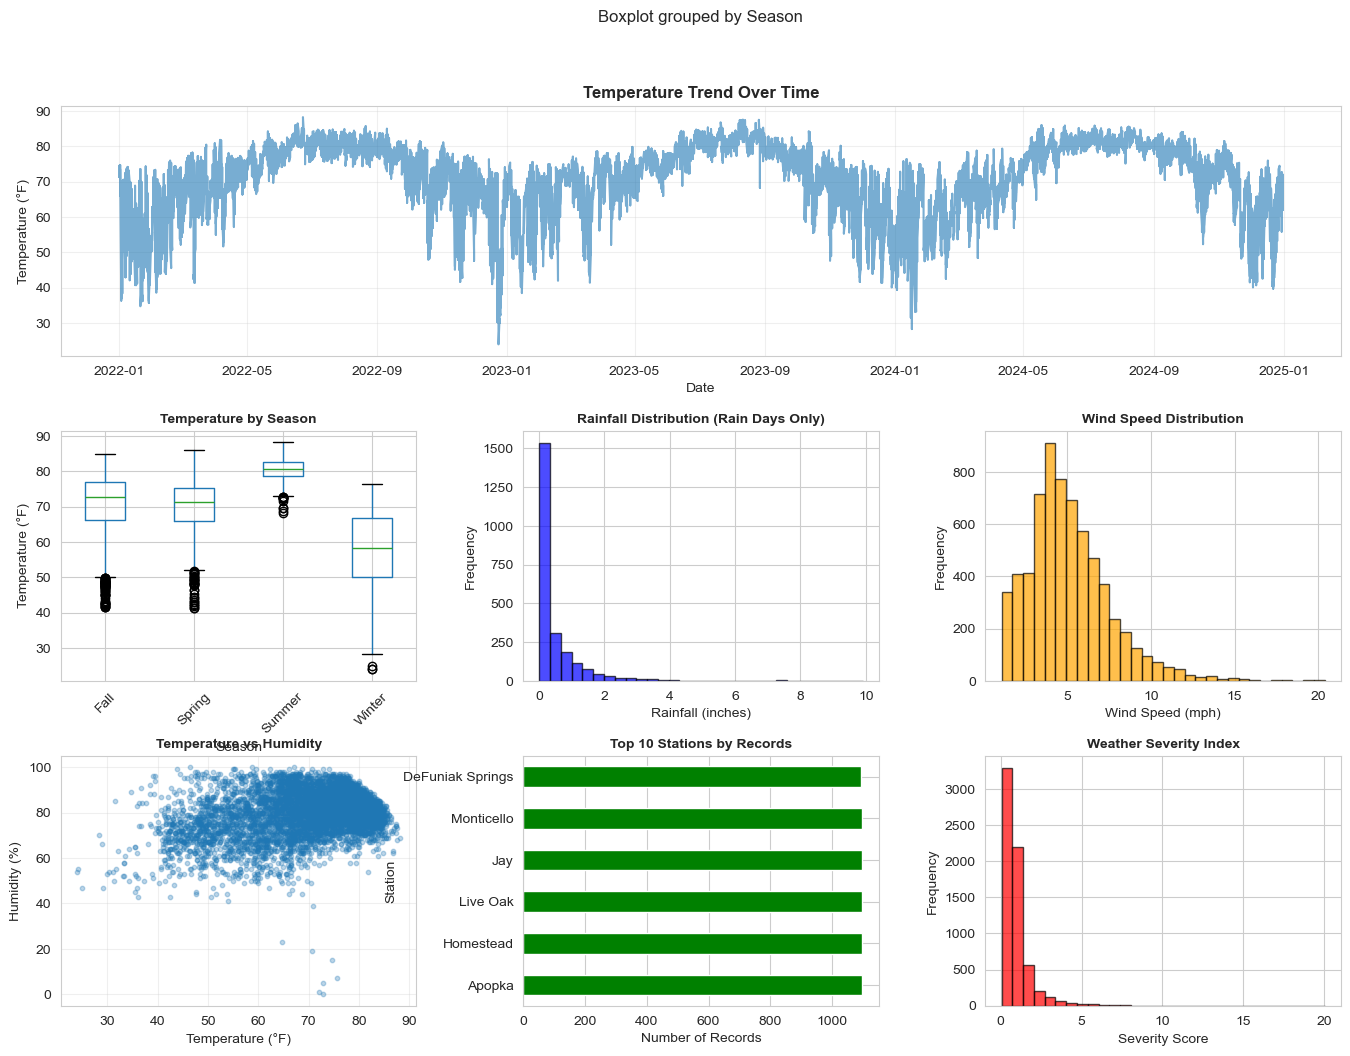

In [9]:
print("STEP 6: SAVE & DOCUMENT")

# CREATE DATA DICTIONARY
print("\n6.1 GENERATE DATA DICTIONARY")

data_dict = {
    'Column_Name': [],
    'Data_Type': [],
    'Description': [],
    'Non_Null_Count': [],
    'Unique_Values': [],
    'Sample_Values': []
}

for col in df.columns:
    data_dict['Column_Name'].append(col)
    data_dict['Data_Type'].append(str(df[col].dtype))
    data_dict['Non_Null_Count'].append(df[col].notna().sum())
    data_dict['Unique_Values'].append(df[col].nunique())
    
    # Sample values
    if df[col].dtype in ['object', 'category']:
        sample = df[col].dropna().unique()[:3].tolist()
    else:
        sample = [f"{df[col].min():.2f}", f"{df[col].mean():.2f}", f"{df[col].max():.2f}"]
    data_dict['Sample_Values'].append(str(sample))
    
    # Descriptions
    descriptions = {
        'FAWN Station': 'Weather station identifier',
        'Period': 'Date/time of observation',
        '2m T avg (F)': 'Average air temperature at 2m height',
        '2m T min (F)': 'Minimum air temperature at 2m height',
        '2m T max (F)': 'Maximum air temperature at 2m height',
        'Temp_Range': 'Daily temperature range (max - min)',
        'Temp_Category': 'Categorized temperature (Freezing/Cold/Mild/Warm/Hot)',
        'Season': 'Season of the year',
        'Rain_Category': 'Rainfall intensity category',
        'Comfort_Index': 'Weather comfort score (0-100)',
        'Weather_Severity': 'Weather severity index',
    }
    data_dict['Description'].append(descriptions.get(col, 'See documentation'))

dict_df = pd.DataFrame(data_dict)
dict_df.to_csv('FAWN_data_dictionary.csv', index=False)
print("✓ Data dictionary saved: FAWN_data_dictionary.csv")
print(dict_df.head(10))

# GENERATE ANALYSIS REPORT
print("\n6.2 CREATE ANALYSIS SUMMARY REPORT")

# Calculate statistics safely
avg_temp = df['2m T avg (F)'].mean()
temp_min = df['2m T min (F)'].min()
temp_max = df['2m T max (F)'].max()
total_rain = df['2m Rain tot (in)'].sum()
rain_days = (df['2m Rain tot (in)'] > 0).sum()
rain_pct = (rain_days / len(df) * 100) if len(df) > 0 else 0
avg_rain_per_event = df[df['2m Rain tot (in)'] > 0]['2m Rain tot (in)'].mean() if rain_days > 0 else 0
avg_wind = df['10m Wind avg (mph)'].mean()
max_wind = df['10m Wind max (mph)'].max()
avg_humidity = df['RelHum avg 2m  (pct)'].mean()
num_stations = df['FAWN Station'].nunique()
most_active = df['FAWN Station'].value_counts().index[0]
records_per_station = len(df) / num_stations if num_stations > 0 else 0

# Correlations
temp_dewpt_corr = df[['2m T avg (F)', '2m DewPt avg (F)']].corr().iloc[0,1]
temp_soil_corr = df[['2m T avg (F)', 'Tsoil avg-10cm  (F)']].corr().iloc[0,1]
temp_humid_corr = df[['2m T avg (F)', 'RelHum avg 2m  (pct)']].corr().iloc[0,1]

# Optional features
temp_category = df['Temp_Category'].mode()[0] if 'Temp_Category' in df.columns and len(df['Temp_Category'].mode()) > 0 else 'N/A'
wind_category = df['Wind_Category'].mode()[0] if 'Wind_Category' in df.columns and len(df['Wind_Category'].mode()) > 0 else 'N/A'
avg_comfort = df['Comfort_Index'].mean() if 'Comfort_Index' in df.columns else 'N/A'

report = f"""
FAWN WEATHER DATA - EXPLORATORY DATA ANALYSIS REPORT
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

DATASET OVERVIEW
Original Records: 6,572
Final Records: {len(df):,}
Original Features: 20
Engineered Features: {len(df.columns) - 20}
Total Features: {len(df.columns)}

DATA QUALITY SUMMARY
Missing Values Handled: Yes
Duplicates Removed: Yes
Outliers Flagged: Yes
Consistency Issues Fixed: Yes
Invalid Records Removed: Yes

KEY FINDINGS

1. TEMPERATURE PATTERNS
   - Average Temperature: {avg_temp:.2f}°F
   - Temperature Range: {temp_min:.2f}°F to {temp_max:.2f}°F
   - Most Common Category: {temp_category}

2. PRECIPITATION PATTERNS
   - Total Rainfall Recorded: {total_rain:.2f} inches
   - Days with Rain: {rain_days} ({rain_pct:.1f}%)
   - Average Rain per Event: {avg_rain_per_event:.3f} inches

3. WIND PATTERNS
   - Average Wind Speed: {avg_wind:.2f} mph
   - Max Wind Speed: {max_wind:.2f} mph
   - Predominant Wind Category: {wind_category}

4. HUMIDITY & COMFORT
   - Average Humidity: {avg_humidity:.1f}%
   - Average Comfort Index: {avg_comfort if isinstance(avg_comfort, str) else f'{avg_comfort:.2f}'}
   
5. STATION ANALYSIS
   - Number of Stations: {num_stations}
   - Most Active Station: {most_active}
   - Records per Station (avg): {records_per_station:.0f}

CORRELATIONS DISCOVERED
Strong positive correlations:
- Temperature <-> Dew Point: {temp_dewpt_corr:.3f}
- Air Temp <-> Soil Temp: {temp_soil_corr:.3f}

Strong negative correlations:
- Temperature <-> Humidity: {temp_humid_corr:.3f}

FEATURE ENGINEERING SUMMARY
Created Features:
+ Temporal: Year, Month, Season, Quarter, DayOfWeek
+ Temperature: Temp_Range, Temp_Category, Apparent_Temp, Wind_Chill
+ Wind: Wind_Range, Wind_Category, Wind_Chill
+ Precipitation: Rain_Category, Has_Rain, Rain_Intensity
+ Composite: Comfort_Index, Weather_Severity
+ Station-level: Station averages and deviations
+ Interactions: Temp*Humidity, Wind*Rain

DATA QUALITY ACTIONS TAKEN
1. Removed {6572 - len(df)} rows with data quality issues
2. Fixed min/max inversions in temperature, wind, and soil temp
3. Interpolated missing values where appropriate
4. Flagged extreme outliers for investigation
5. Validated all measurements within reasonable ranges
"""

# Save report
with open('FAWN_analysis_report.txt', 'w', encoding='utf-8') as f:
    f.write(report)

print("✓ Analysis report saved: FAWN_analysis_report.txt")
print(report)

# === CREATE FINAL VISUALIZATIONS ===
print("\n6.3 GENERATE FINAL SUMMARY VISUALIZATIONS")
print("-" * 50)

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Title
fig.suptitle('FAWN Weather Data - Executive Summary Dashboard', fontsize=18, fontweight='bold')

# 1. Temperature Over Time
if 'Period' in df.columns:
    ax1 = fig.add_subplot(gs[0, :])
    df_sorted = df.sort_values('Period')
    ax1.plot(pd.to_datetime(df_sorted['Period']), df_sorted['2m T avg (F)'], alpha=0.6)
    ax1.set_title('Temperature Trend Over Time', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Temperature (°F)')
    ax1.grid(True, alpha=0.3)

# 2. Temperature Distribution by Season
ax2 = fig.add_subplot(gs[1, 0])
if 'Season' in df.columns:
    df.boxplot(column='2m T avg (F)', by='Season', ax=ax2)
    ax2.set_title('Temperature by Season', fontsize=10, fontweight='bold')
    ax2.set_xlabel('Season')
    ax2.set_ylabel('Temperature (°F)')
    plt.sca(ax2)
    plt.xticks(rotation=45)

# 3. Rainfall Distribution
ax3 = fig.add_subplot(gs[1, 1])
rain_data = df[df['2m Rain tot (in)'] > 0]['2m Rain tot (in)']
ax3.hist(rain_data, bins=30, edgecolor='black', alpha=0.7, color='blue')
ax3.set_title('Rainfall Distribution (Rain Days Only)', fontsize=10, fontweight='bold')
ax3.set_xlabel('Rainfall (inches)')
ax3.set_ylabel('Frequency')

# 4. Wind Speed Distribution
ax4 = fig.add_subplot(gs[1, 2])
ax4.hist(df['10m Wind avg (mph)'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='orange')
ax4.set_title('Wind Speed Distribution', fontsize=10, fontweight='bold')
ax4.set_xlabel('Wind Speed (mph)')
ax4.set_ylabel('Frequency')

# 5. Temperature vs Humidity
ax5 = fig.add_subplot(gs[2, 0])
ax5.scatter(df['2m T avg (F)'], df['RelHum avg 2m  (pct)'], alpha=0.3, s=10)
ax5.set_title('Temperature vs Humidity', fontsize=10, fontweight='bold')
ax5.set_xlabel('Temperature (°F)')
ax5.set_ylabel('Humidity (%)')
ax5.grid(True, alpha=0.3)

# 6. Station Activity
ax6 = fig.add_subplot(gs[2, 1])
station_counts = df['FAWN Station'].value_counts().head(10)
station_counts.plot(kind='barh', ax=ax6, color='green')
ax6.set_title('Top 10 Stations by Records', fontsize=10, fontweight='bold')
ax6.set_xlabel('Number of Records')
ax6.set_ylabel('Station')

# 7. Weather Severity
ax7 = fig.add_subplot(gs[2, 2])
if 'Weather_Severity' in df.columns:
    ax7.hist(df['Weather_Severity'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='red')
    ax7.set_title('Weather Severity Index', fontsize=10, fontweight='bold')
    ax7.set_xlabel('Severity Score')
    ax7.set_ylabel('Frequency')

plt.savefig('FAWN_summary_dashboard.png', dpi=300, bbox_inches='tight')
print("✓ Summary dashboard saved: FAWN_summary_dashboard.png")
plt.show()

### Analysis
The last couple of graphs display **summaries** of:
- Temp by season
- Number of days of Rainfall
- Frequencies of wind speed
- The correlation between Temperature and Humidity
- The number of records by each FAWN station
- Frequencies of Weather severity 